In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [4]:
data_bangalore = pd.read_excel('bangalore_cars.xlsx')
data_bangalore.head(1)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [10]:
import numpy as np
import ast

# Initialize lists to store parsed data
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []

# Loop through each row in the DataFrame
for i in range(data_bangalore.shape[0]):
    try:
        # Parse the JSON-like strings into dictionaries
        new_car_detail = ast.literal_eval(data_bangalore['new_car_detail'][i])
        new_car_overview = ast.literal_eval(data_bangalore['new_car_overview'][i])
        new_car_specs = ast.literal_eval(data_bangalore['new_car_specs'][i])

        # Extract data from parsed dictionaries
        fuel_type.append(new_car_detail.get('ft', np.nan))
        Kilometers_driven.append(new_car_detail.get('km', np.nan))
        Transmission_type.append(new_car_detail.get('transmission', np.nan))
        No_of_owners.append(new_car_detail.get('ownerNo', np.nan))
        Original_Equipment_Manufacturer.append(new_car_detail.get('oem', np.nan))
        model.append(new_car_detail.get('model', np.nan))
        model_Year.append(int(new_car_detail.get('modelYear', 0)))

        # Price extraction and conversion
        price_str = new_car_detail.get('price', '0')
        try:
            Price.append(float(price_str[2:-5]) * 100000)
        except:
            Price.append(np.nan)

        # Registration year and seats
        registration_year.append(new_car_overview['top'][0].get('value', '')[-4:])
        seats.append(new_car_overview['top'][3].get('value', [np.nan])[0])

        # Engine CC and Mileage with error handling
        try:
            engine_info = new_car_specs['data'][0]['list']
            if engine_info[2]['value'].isnumeric():
                engine_cc.append(engine_info[2]['value'])
            else:
                engine_cc.append(engine_info[1]['value'])
        except:
            engine_cc.append(np.nan)

        try:
            mileage_str = new_car_specs['top'][0].get('value', '0 kmpl')[:-5]
            Mileage.append(float(mileage_str))
        except:
            Mileage.append(np.nan)

    except Exception as e:
        # Append NaN for all fields if an error occurs
        fuel_type.append(np.nan)
        Kilometers_driven.append(np.nan)
        Transmission_type.append(np.nan)
        No_of_owners.append(np.nan)
        Original_Equipment_Manufacturer.append(np.nan)
        model.append(np.nan)
        model_Year.append(np.nan)
        Price.append(np.nan)
        registration_year.append(np.nan)
        seats.append(np.nan)
        engine_cc.append(np.nan)
        Mileage.append(np.nan)
        print(f"Error processing row {i}: {e}")



data_bangalore['Fuel_Type'] = fuel_type
data_bangalore['Kilometers_Driven'] = Kilometers_driven
data_bangalore['Transmission_Type'] = Transmission_type
data_bangalore['No_of_Owners'] = No_of_owners
data_bangalore['Manufactured_By'] = Original_Equipment_Manufacturer
data_bangalore['Car_Model'] = model
data_bangalore['Car_Produced_Year'] = model_Year
data_bangalore['Car_Price'] = Price
data_bangalore['Registration_Year'] = registration_year
data_bangalore['No_of_Seats'] = seats
data_bangalore['Engine_CC'] = engine_cc
data_bangalore['Mileage(kmpl)'] = Mileage

In [11]:
data_bangalore.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.10
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17.00
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.10
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65


In [12]:
data_bangalore['Location'] = 'Bangalore'

In [13]:
data_chennai = pd.read_excel('chennai_cars.xlsx')
data_chennai.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [14]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_chennai.shape[0]):
    new_car_detail = data_chennai['new_car_detail'][i]
    new_car_overview = data_chennai['new_car_overview'][i]
    new_car_specs = data_chennai['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_chennai['Fuel_Type'] = fuel_type
data_chennai['Kilometers_Driven'] = Kilometers_driven
data_chennai['Transmission_Type'] = Transmission_type
data_chennai['No_of_Owners'] = No_of_owners
data_chennai['Manufactured_By'] = Original_Equipment_Manufacturer
data_chennai['Car_Model'] = model
data_chennai['Car_Produced_Year'] = model_Year
data_chennai['Car_Price'] = Price
data_chennai['Registration_Year'] = registration_year
data_chennai['No_of_Seats'] = seats
data_chennai['Engine_CC'] = engine_cc
data_chennai['Mileage(kmpl)'] = Mileage

In [15]:
data_chennai.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7


In [16]:
data_chennai['Location'] = 'Chennai'

In [18]:
data_delhi = pd.read_excel('delhi_cars.xlsx')
data_delhi.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [20]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_delhi.shape[0]):
    new_car_detail = data_delhi['new_car_detail'][i]
    new_car_overview = data_delhi['new_car_overview'][i]
    new_car_specs = data_delhi['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])


    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_delhi['Fuel_Type'] = fuel_type
data_delhi['Kilometers_Driven'] = Kilometers_driven
data_delhi['Transmission_Type'] = Transmission_type
data_delhi['No_of_Owners'] = No_of_owners
data_delhi['Manufactured_By'] = Original_Equipment_Manufacturer
data_delhi['Car_Model'] = model
data_delhi['Car_Produced_Year'] = model_Year
data_delhi['Car_Price'] = Price
data_delhi['Registration_Year'] = registration_year
data_delhi['No_of_Seats'] = seats
data_delhi['Engine_CC'] = engine_cc
data_delhi['Mileage(kmpl)'] = Mileage

In [21]:
data_delhi.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29


In [22]:
data_delhi['Location'] = 'delhi'

In [23]:
data_hyderabad = pd.read_excel('hyderabad_cars.xlsx')
data_hyderabad.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [24]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_hyderabad.shape[0]):
    new_car_detail = data_hyderabad['new_car_detail'][i]
    new_car_overview = data_hyderabad['new_car_overview'][i]
    new_car_specs = data_hyderabad['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])


    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_hyderabad['Fuel_Type'] = fuel_type
data_hyderabad['Kilometers_Driven'] = Kilometers_driven
data_hyderabad['Transmission_Type'] = Transmission_type
data_hyderabad['No_of_Owners'] = No_of_owners
data_hyderabad['Manufactured_By'] = Original_Equipment_Manufacturer
data_hyderabad['Car_Model'] = model
data_hyderabad['Car_Produced_Year'] = model_Year
data_hyderabad['Car_Price'] = Price
data_hyderabad['Registration_Year'] = registration_year
data_hyderabad['No_of_Seats'] = seats
data_hyderabad['Engine_CC'] = engine_cc
data_hyderabad['Mileage(kmpl)'] = Mileage

In [25]:
data_hyderabad.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,999,16.47
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,814,21.1
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,1197,11
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,1197,21.4
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,1997,19


In [26]:
data_hyderabad['Location'] = 'Hyderabad'

In [27]:
data_jaipur = pd.read_excel('jaipur_cars.xlsx')
data_jaipur.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [28]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_jaipur.shape[0]):
    new_car_detail = data_jaipur['new_car_detail'][i]
    new_car_overview = data_jaipur['new_car_overview'][i]
    new_car_specs = data_jaipur['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_jaipur['Fuel_Type'] = fuel_type
data_jaipur['Kilometers_Driven'] = Kilometers_driven
data_jaipur['Transmission_Type'] = Transmission_type
data_jaipur['No_of_Owners'] = No_of_owners
data_jaipur['Manufactured_By'] = Original_Equipment_Manufacturer
data_jaipur['Car_Model'] = model
data_jaipur['Car_Produced_Year'] = model_Year
data_jaipur['Car_Price'] = Price
data_jaipur['Registration_Year'] = registration_year
data_jaipur['No_of_Seats'] = seats
data_jaipur['Engine_CC'] = engine_cc
data_jaipur['Mileage(kmpl)'] = Mileage

In [29]:
data_jaipur.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51


In [30]:
data_jaipur['Location'] = 'Jaipur'

In [31]:
data_kolkata = pd.read_excel('kolkata_cars.xlsx')
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [32]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_kolkata.shape[0]):
    new_car_detail = data_kolkata['new_car_detail'][i]
    new_car_overview = data_kolkata['new_car_overview'][i]
    new_car_specs = data_kolkata['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_kolkata['Fuel_Type'] = fuel_type
data_kolkata['Kilometers_Driven'] = Kilometers_driven
data_kolkata['Transmission_Type'] = Transmission_type
data_kolkata['No_of_Owners'] = No_of_owners
data_kolkata['Manufactured_By'] = Original_Equipment_Manufacturer
data_kolkata['Car_Model'] = model
data_kolkata['Car_Produced_Year'] = model_Year
data_kolkata['Car_Price'] = Price
data_kolkata['Registration_Year'] = registration_year
data_kolkata['No_of_Seats'] = seats
data_kolkata['Engine_CC'] = engine_cc
data_kolkata['Mileage(kmpl)'] = Mileage

In [33]:
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73


In [34]:
data_kolkata['Location'] = 'Kolkata'

In [37]:
data = pd.concat([data_kolkata,data_chennai,data_bangalore,data_hyderabad,data_jaipur,data_delhi]).reset_index()

In [38]:
data.shape

(8369, 19)

In [39]:
data

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolkata
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolkata
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolkata
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolkata
4,4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2019,5,1497,18,delhi
8365,1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2021,5,1197,18.4,delhi
8366,1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2011,5,1591,17.01,delhi
8367,1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2019,5,1582,20.5,delhi


In [40]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [41]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [42]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2024-x)

In [43]:
print(data.shape)
data.head()

(8369, 14)


,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
0,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolkata,10
1,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolkata,7
2,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolkata,3
3,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolkata,13
4,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolkata,10


In [44]:
data['Engine_CC'].unique()

array(['2494', '799', '999', '1197', '1968', '1086', '1298', '998',
       '1956', '2755', '1999', '1199', '1373', '1497', '1591', '1950',
       '1496', '1396', '1799', '1047', '1198', '1598', '1995', '1368',
       '1998', '1499', '1498', '1817', '1797', '2143', '1248', '796',
       '1582', '3993', '1798', '2179', '2982', '2400', '2499', '1462',
       '1997', '1996', '1451', '814', '995', '1353', '1186', '1493',
       '2393', '1948', '2993', '1984', '1120', '1461', '1390', nan,
       '2354', '1991', '1969', '2523', '4806', '2359', '2184', '3198',
       '3982', '2157', '1196', '2987', '1794', '936', '2994', '1399',
       '2198', '1495', '2967', '2696', '993', '1061', '1405', '1993',
       '1193', '1490', '1349', '0', '2995', '1364', '1395', '2609',
       '3498', '2489', '1172', '1796', '2694', '1194', '4663', '2925',
       '2999', '1896', '1482', '624', '793', '4134', '1422', '1468',
       '1599', '1586', '2199', '1330', '2477', '2998', '2997', '2487',
       '1341', '1397',

In [45]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

,count
Engine_CC,
0,26
Power,3
210AH Lithium Ion,1
72,1


In [46]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [47]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

In [48]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model
257,Hyundai,Hyundai Santro Xing
261,Toyota,Toyota Etios Liva
565,Toyota,Toyota Etios Liva
567,Honda,Honda CR-V
620,Maruti,Maruti Estilo
...,...,...
6537,Hyundai,Hyundai Santro Xing
6729,Tata,Tata Indica
7268,Toyota,Toyota Etios
7737,Hyundai,Hyundai Santro Xing


In [49]:
for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
    data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [50]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 14)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8343 non-null   object 
 1   Kilometers_Driven  8343 non-null   object 
 2   Transmission_Type  8343 non-null   object 
 3   No_of_Owners       8343 non-null   int64  
 4   Manufactured_By    8343 non-null   object 
 5   Car_Model          8343 non-null   object 
 6   Car_Produced_Year  8343 non-null   int64  
 7   Car_Price          8343 non-null   float64
 8   Registration_Year  8343 non-null   object 
 9   No_of_Seats        8343 non-null   object 
 10  Engine_CC          8343 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8343 non-null   object 
 13  Car_Age            8343 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.7+ KB


In [52]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(lambda x: x.replace(',',''))
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
data['Registration_Year'] = data['Registration_Year'].astype('int')
data['No_of_Seats'] = data['No_of_Seats'].astype('int')
data['Engine_CC'] = data['Engine_CC'].astype('int')
data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype('float')

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8343 non-null   object 
 1   Kilometers_Driven  8343 non-null   int64  
 2   Transmission_Type  8343 non-null   object 
 3   No_of_Owners       8343 non-null   int64  
 4   Manufactured_By    8343 non-null   object 
 5   Car_Model          8343 non-null   object 
 6   Car_Produced_Year  8343 non-null   int64  
 7   Car_Price          8343 non-null   float64
 8   Registration_Year  8343 non-null   int64  
 9   No_of_Seats        8343 non-null   int64  
 10  Engine_CC          8343 non-null   int64  
 11  Mileage(kmpl)      8339 non-null   float64
 12  Location           8343 non-null   object 
 13  Car_Age            8343 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 977.7+ KB


In [54]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
24,Diesel,30000,Automatic,2,Land Rover,Land Rover Range Rover Evoque,2020,5990000.0,2020,5,1999,19.00,Kolkata,4
45,Petrol,60000,Manual,1,Maruti,Maruti Swift Dzire,2010,245000.0,2010,5,1298,17.50,Kolkata,14
190,Petrol,10000,Manual,2,Maruti,Maruti XL6,2021,950000.0,2021,6,1462,19.01,Kolkata,3
207,Petrol,10000,Manual,1,Tata,Tata Altroz,2020,735000.0,2020,5,1199,19.33,Kolkata,4
215,Petrol,100000,Manual,1,Hyundai,Hyundai i10,2015,310000.0,2015,5,1086,19.81,Kolkata,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Diesel,100000,Manual,1,Ford,Ford Aspire,2015,315000.0,2015,5,1498,25.83,delhi,9
8126,Diesel,40000,Automatic,1,Mercedes-Benz,Mercedes-Benz CLA,2018,2650000.0,2018,5,2143,17.90,delhi,6
8188,Petrol,20000,Manual,2,Kia,Kia Seltos,2021,925000.0,2021,5,1497,16.80,delhi,3
8324,Petrol,30000,Manual,1,Toyota,Toyota Glanza,2022,740000.0,2022,5,1197,22.35,delhi,2


In [55]:
data.drop_duplicates(inplace = True)

In [56]:
data.shape

(8219, 14)

In [57]:
8135

8135

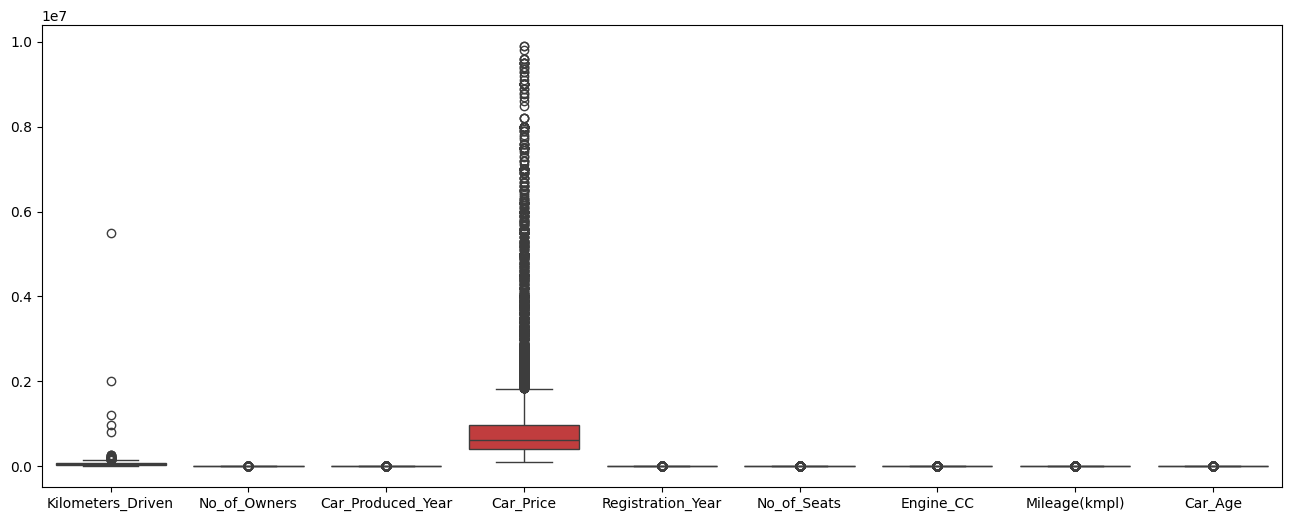

In [58]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

Kilometers_Driven


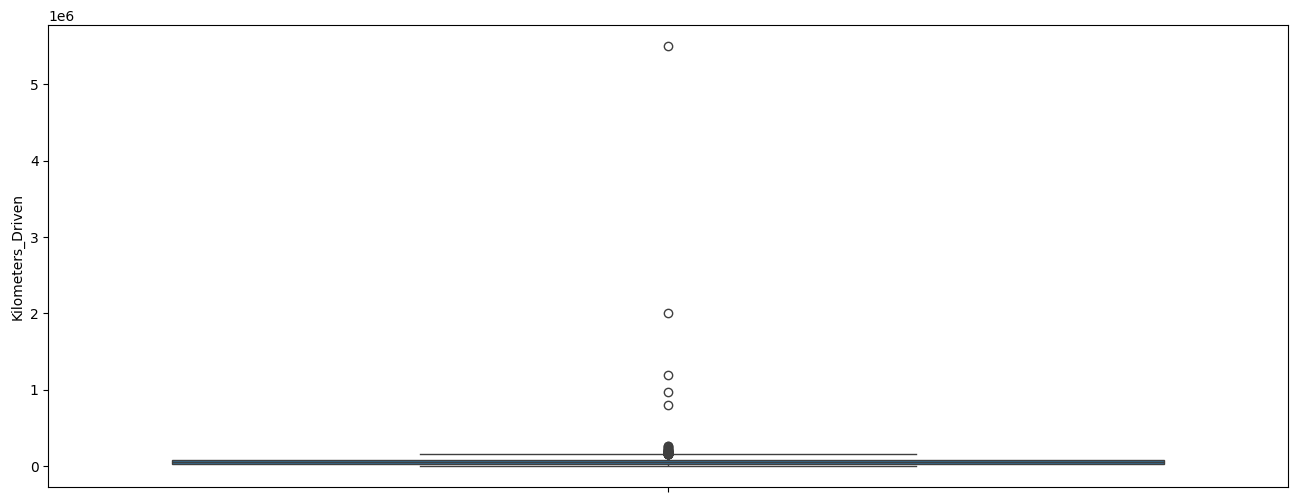

No_of_Owners


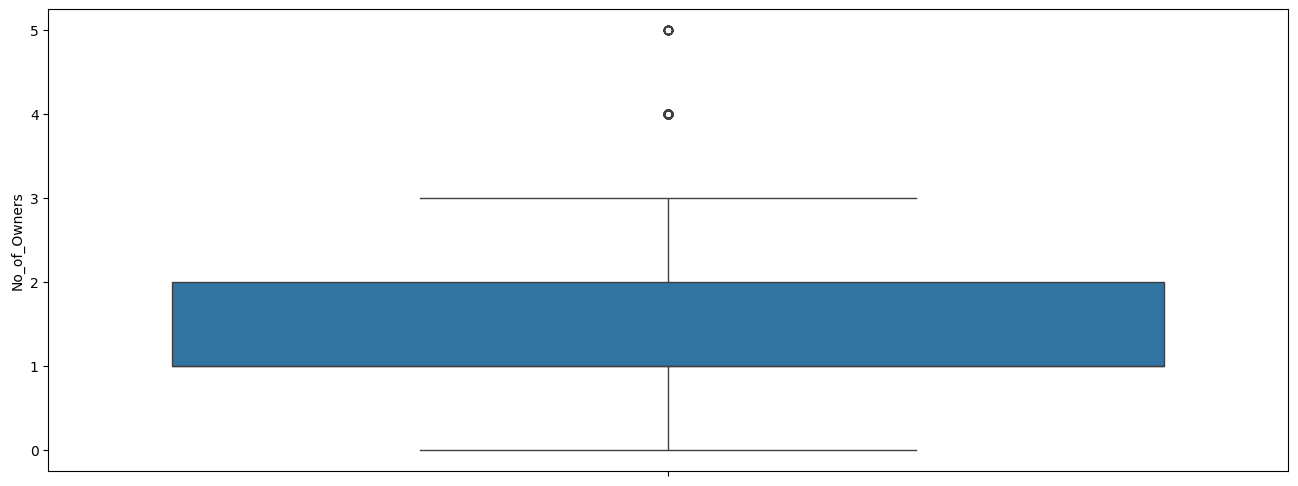

Car_Produced_Year


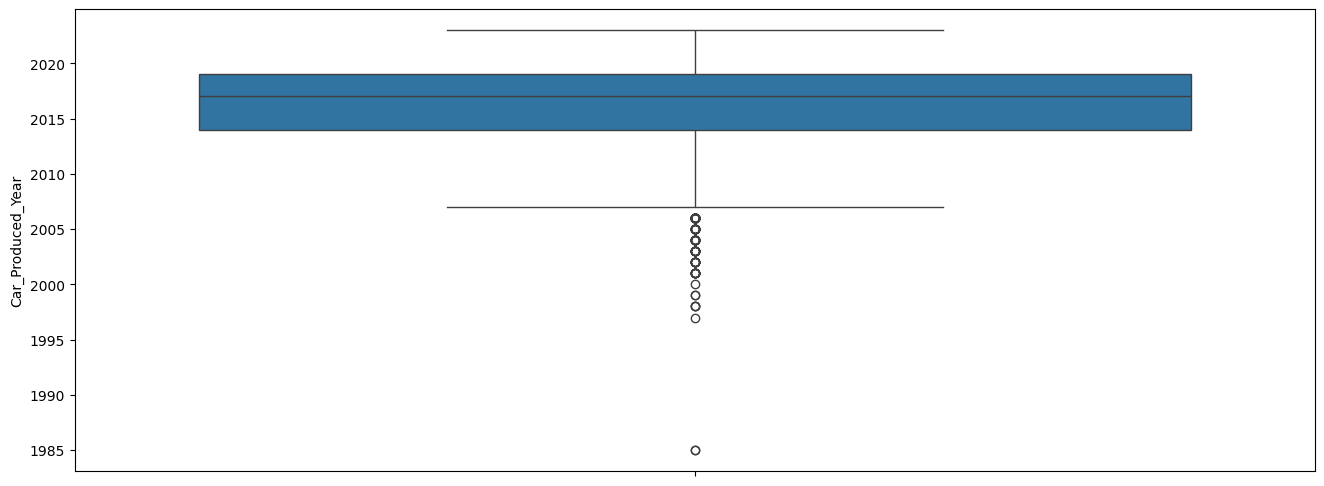

Car_Price


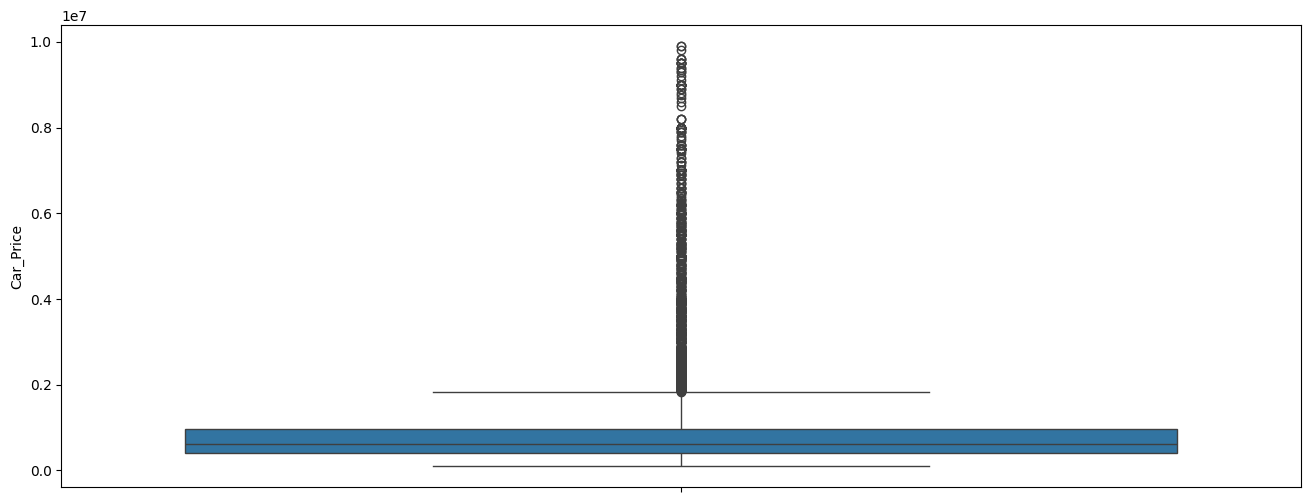

Registration_Year


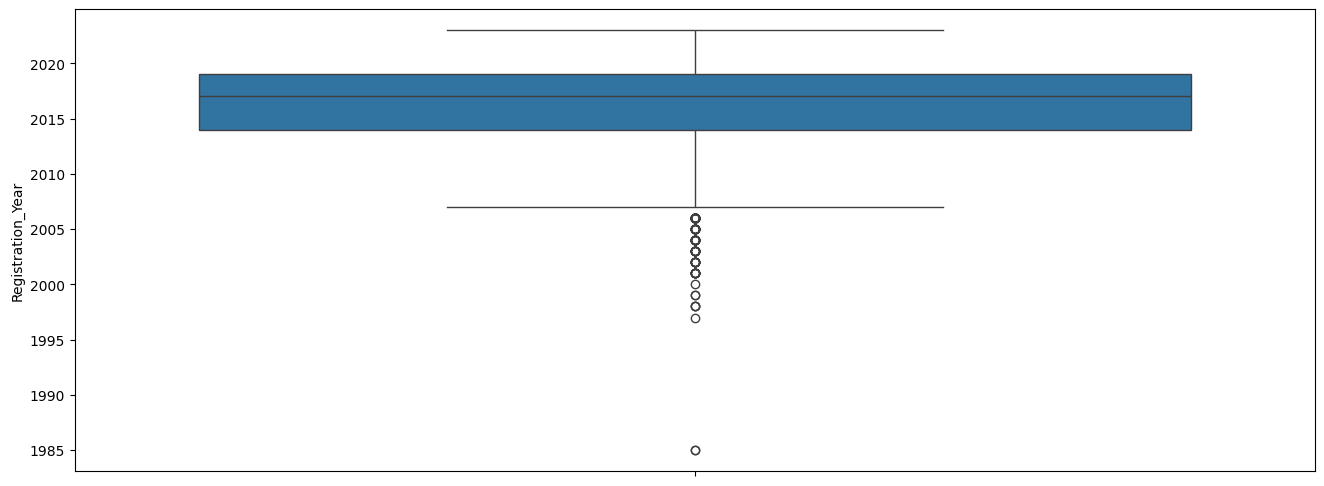

No_of_Seats


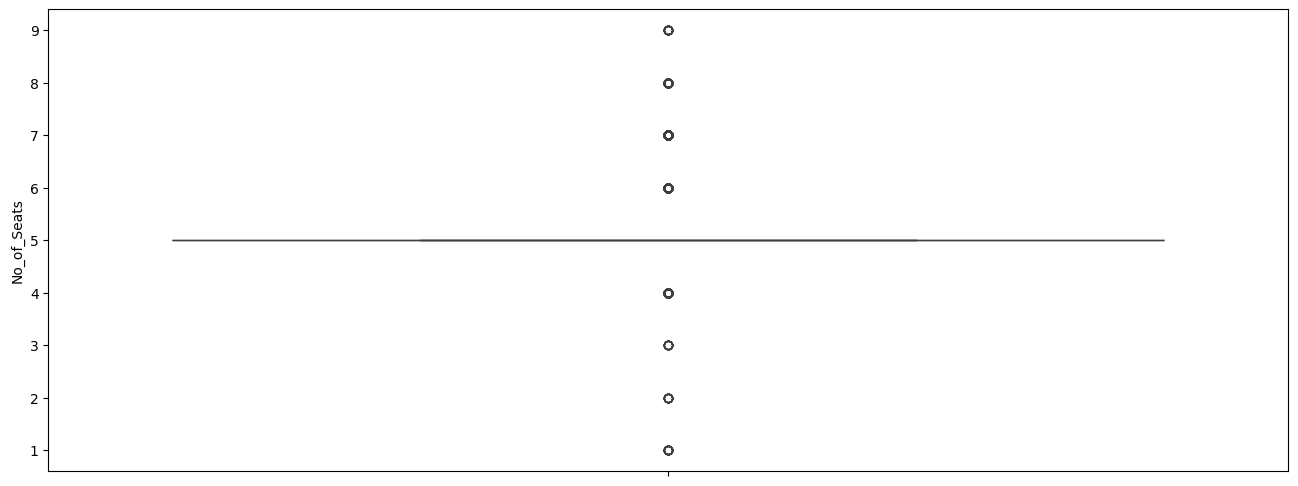

Engine_CC


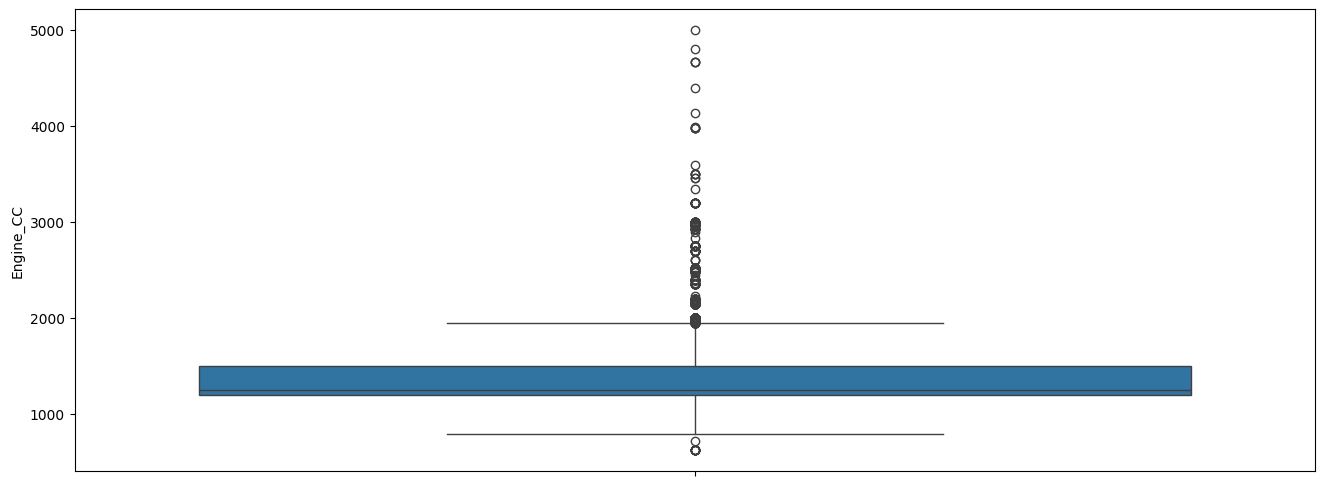

Mileage(kmpl)


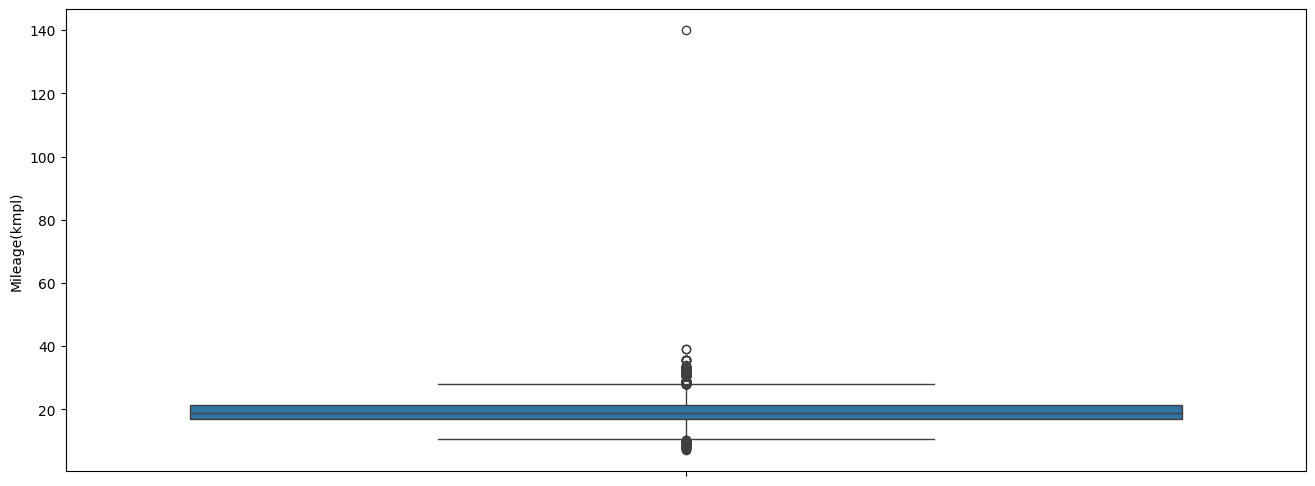

Car_Age


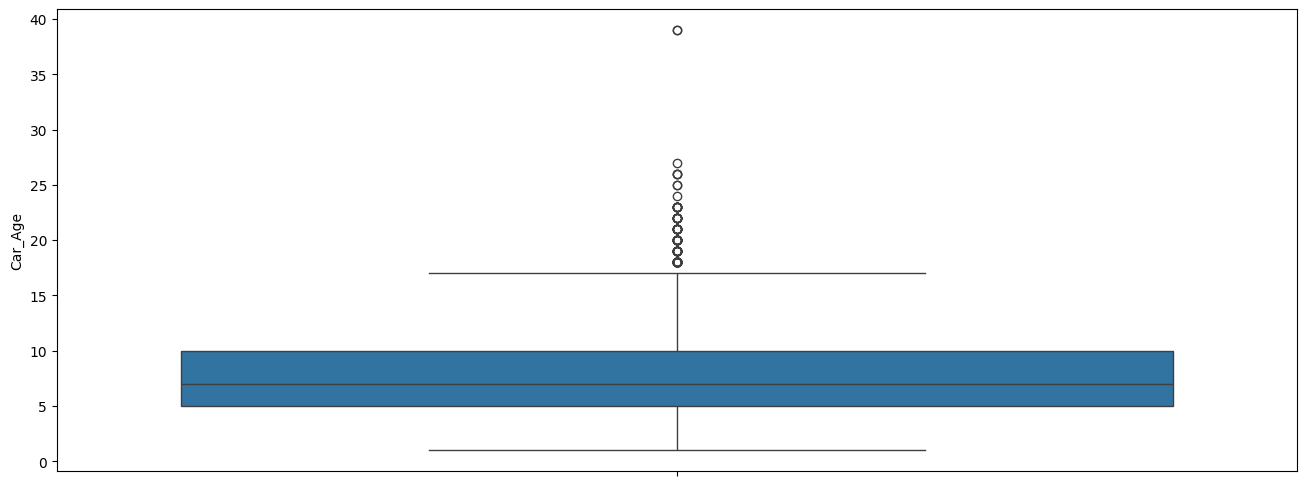

In [59]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=data[i])
        plt.show()

In [60]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

In [61]:
data.to_csv('Cleaned_Car_Dheko.csv', index = False)

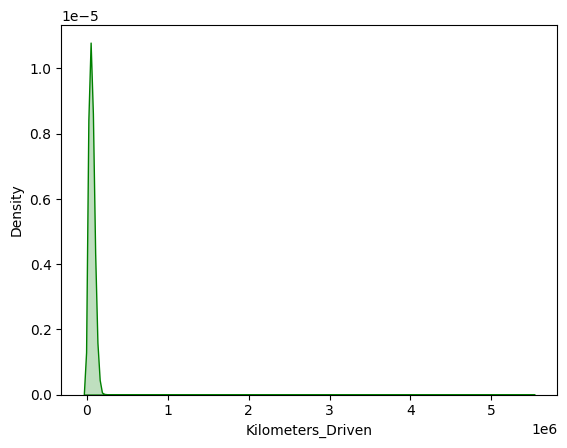

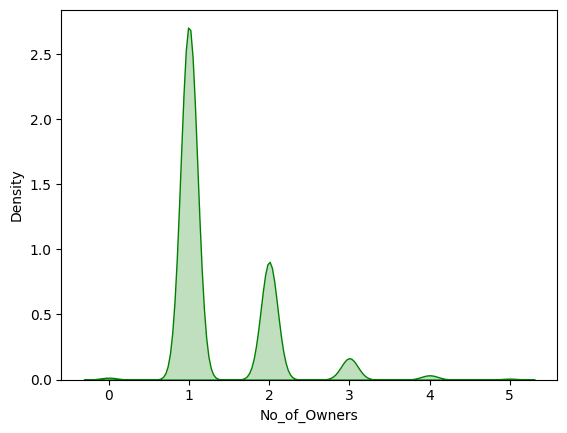

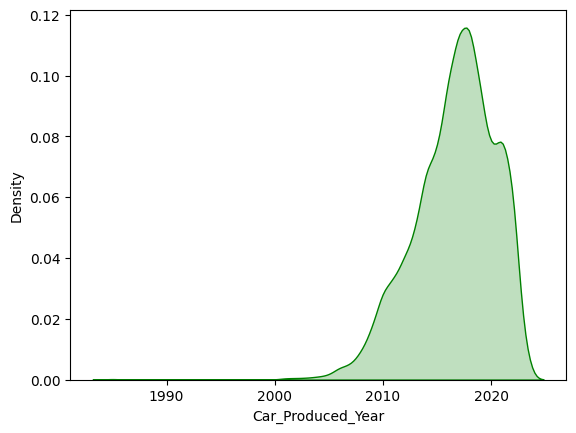

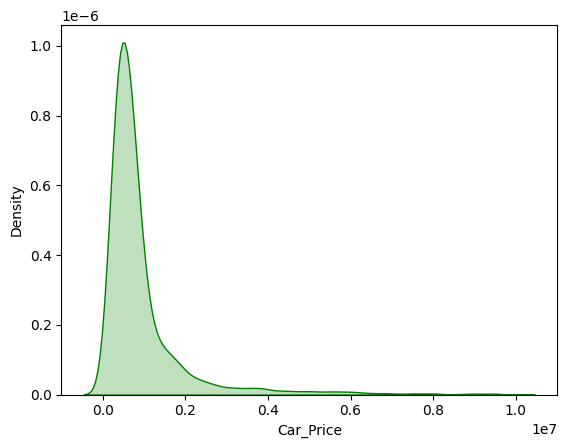

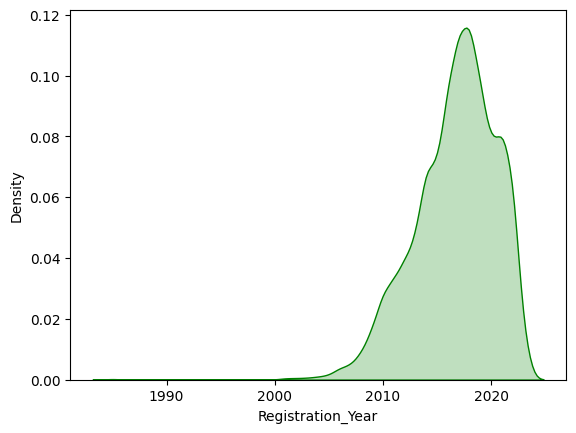

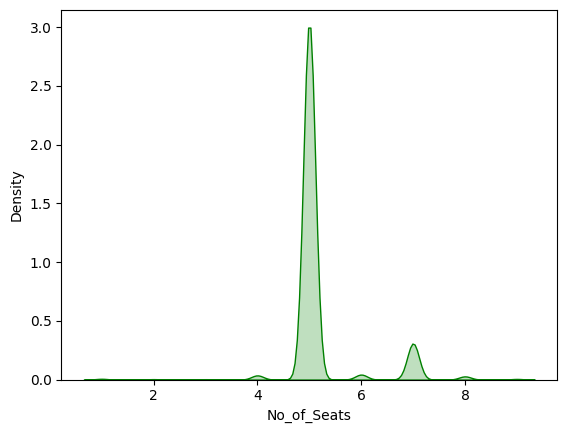

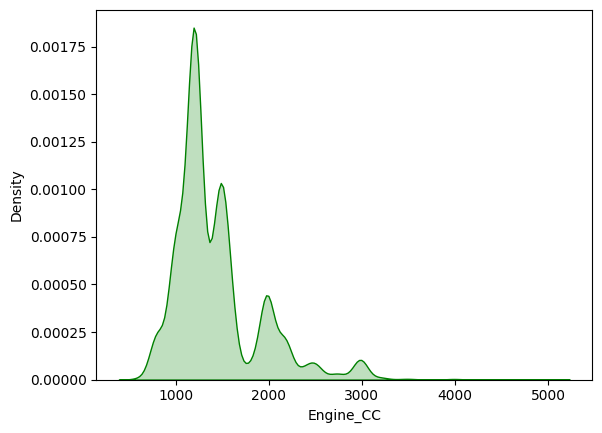

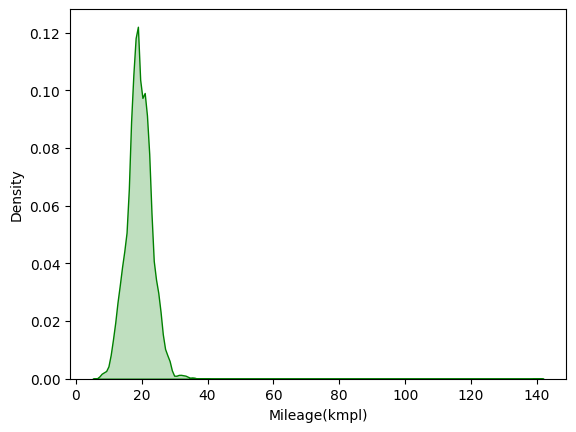

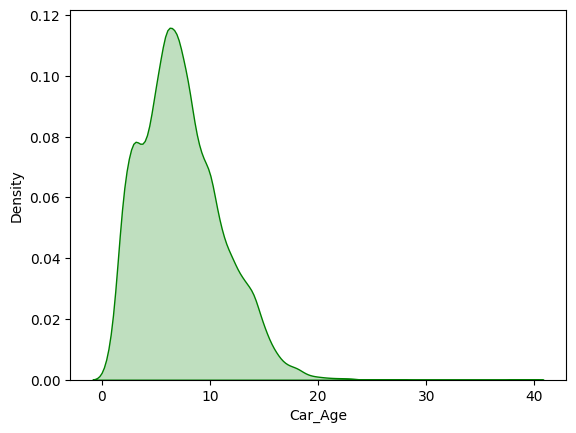

In [62]:
for i in data.columns:
    if data[i].dtype != 'object' :
        sns.kdeplot(data=data[i],fill=True,color="g")
        plt.show()

In [63]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)

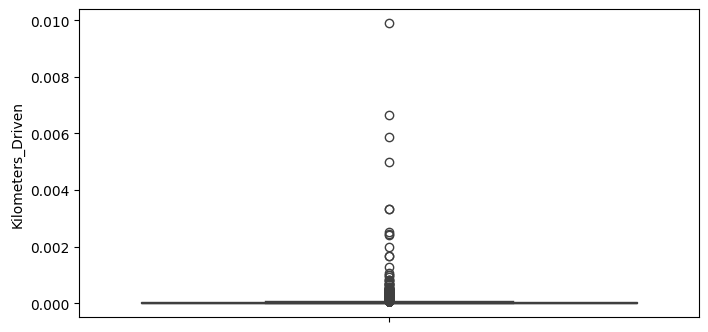

In [64]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data['Kilometers_Driven'])
plt.show()

In [65]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        col_name = i
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [66]:
Location

{'Bangalore': 0.0,
 'Chennai': 1.0,
 'Hyderabad': 2.0,
 'Jaipur': 3.0,
 'Kolkata': 4.0,
 'delhi': 5.0}

In [67]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [68]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [69]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

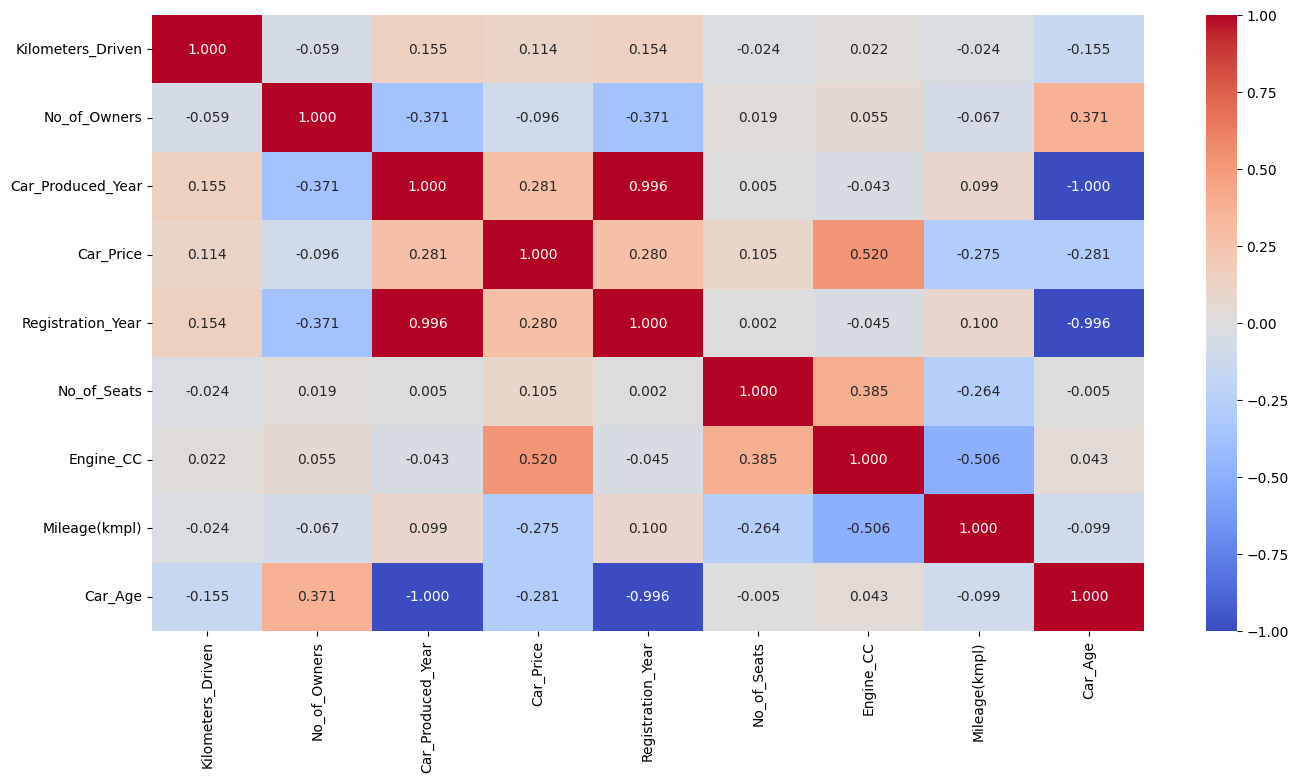

In [70]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [73]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [74]:
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 6.131250837877926e-26
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 8.532607947292595e-40
Transmission_Type Fuel_Type 6.131250837877926e-26
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 4.399215315227877e-33
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 1.1240994513028331e-35
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 4.16595764813843e-49
Location Fuel_Type 8.532607947292595e-40
Location Transmission_Type 4.399215315227877e-33
Location Manufactured_By 1.124099451302801e-35
Location Car_Model 4.16595764813843e-49
Location Location 0.0


In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [77]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [78]:
model.feature_importances_

array([0.00864453, 0.06103504, 0.08524202, 0.01192064, 0.01968844,
       0.05953749, 0.19063713, 0.0129605 , 0.46569666, 0.05544834,
       0.0291892 ])

In [79]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,46.569666
6,Car_Produced_Year,19.063713
2,Transmission_Type,8.524202
1,Kilometers_Driven,6.103504
5,Car_Model,5.953749
9,Mileage(kmpl),5.544834
10,Location,2.918920
4,Manufactured_By,1.968844
7,No_of_Seats,1.296050
3,No_of_Owners,1.192064


In [80]:
x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8139, 7)


,Kilometers_Driven,Transmission_Type,Car_Model,Car_Produced_Year,Engine_CC,Mileage(kmpl),Location
0,0.000014,0.0,267.0,2014,2494,19.16,4.0
1,0.000042,1.0,38.0,2017,799,22.70,4.0
2,0.000141,0.0,230.0,2021,999,19.03,4.0
3,0.000014,1.0,88.0,2011,1197,17.00,4.0
4,0.000020,0.0,7.0,2014,1968,15.73,4.0
...,...,...,...,...,...,...,...
8134,0.000017,0.0,62.0,2019,1497,18.00,5.0
8135,0.000050,1.0,106.0,2021,1197,18.40,5.0
8136,0.000017,1.0,84.0,2011,1591,17.01,5.0
8137,0.000026,1.0,72.0,2019,1582,20.50,5.0


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [82]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6511, 7), (1628, 7), (6511,), (1628,))

In [83]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [84]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

170463.59738744164
245985.38556720372
0.8059777471585502
0.5963198227958817


In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
from sklearn.impute import SimpleImputer

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform x_train
x_train_imputed = imputer.fit_transform(x_train)

# Apply the same transformation to x_test (if applicable)
x_test_imputed = imputer.transform(x_test)


In [91]:
model_kn = KNeighborsRegressor(n_neighbors=4)
model_kn.fit(x_train_imputed, y_train)


KNeighborsRegressor(n_neighbors=4)

In [92]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_hgb = HistGradientBoostingRegressor()
model_hgb.fit(x_train, y_train)


HistGradientBoostingRegressor()

In [94]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Refit the model with the imputed data
model_kn = KNeighborsRegressor(n_neighbors=4)
model_kn.fit(x_train_imputed, y_train)

# Predict using the imputed test data
y_pred_test = model_kn.predict(x_test_imputed)
y_pred_train = model_kn.predict(x_train_imputed)


In [96]:
x_train_imputed = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [97]:
model_kn = KNeighborsRegressor(n_neighbors=4)
model_kn.fit(x_train_imputed, y_train)

y_pred_test = model_kn.predict(x_test_imputed)
y_pred_train = model_kn.predict(x_train_imputed)


In [98]:
from sklearn.ensemble import AdaBoostRegressor

In [103]:
print(x_train.isnull().sum())


Kilometers_Driven    0
Transmission_Type    0
Car_Model            0
Car_Produced_Year    0
Engine_CC            0
Mileage(kmpl)        4
Location             0
dtype: int64


In [104]:
from sklearn.impute import SimpleImputer

# Define imputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Apply imputation to training and testing data
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)


In [107]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)